<a href="https://colab.research.google.com/github/Payal-iitr/Data_Science_Assignment/blob/main/ITS_ASSIGNMENT02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import time
import numpy as np

# API Keys
TOMTOM_API_KEY = "f2ceCpRbWxILwtTE72xcyrgbNr3hv0KG"
WEATHER_API_KEY = "a7a73162a47148c018a5dec64a4d9638"

#Define a Fine Grid Over Delhi (~100 Locations)
DELHI_GRID = [(lat, lon) for lat in np.arange(28.4, 28.9, 0.05) for lon in np.arange(76.9, 77.4, 0.05)]

def get_traffic_data(lat, lon):
    """Fetches traffic congestion data for a given location from TomTom API."""
    url = f"https://api.tomtom.com/traffic/services/4/flowSegmentData/absolute/10/json?key={TOMTOM_API_KEY}&point={lat},{lon}"
    try:
        response = requests.get(url).json()
        if "flowSegmentData" in response:
            return {
                "Latitude": lat,
                "Longitude": lon,
                "Current Speed (km/h)": response["flowSegmentData"]["currentSpeed"],
                "Free Flow Speed (km/h)": response["flowSegmentData"]["freeFlowSpeed"],
                "Congestion Level (%)": round(
                    (1 - response["flowSegmentData"]["currentSpeed"] / response["flowSegmentData"]["freeFlowSpeed"]) * 100, 2
                ),
            }
    except:
        print(f"⚠ Error fetching traffic data for ({lat}, {lon})")
    return {}

def get_weather_data(lat, lon):
    """Fetches weather data for a given location from OpenWeather API."""
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={WEATHER_API_KEY}&units=metric"
    try:
        response = requests.get(url).json()
        if "main" in response:
            return {
                "Temperature (°C)": response["main"]["temp"],
                "Humidity (%)": response["main"]["humidity"],
                "Weather Condition": response["weather"][0]["description"],
            }
    except:
        print(f"⚠ Error fetching weather data for ({lat}, {lon})")
    return {}

# Fetch Data for All Locations
data_list = []
for i, (lat, lon) in enumerate(DELHI_GRID):
    print(f" Processing ({lat}, {lon})... [{i+1}/{len(DELHI_GRID)}]")

    traffic = get_traffic_data(lat, lon)
    weather = get_weather_data(lat, lon)

    if traffic and weather:
        traffic.update(weather)  # Merge traffic and weather data
        data_list.append(traffic)

    time.sleep(0.4)  # Prevent API rate limits

    if i % 10 == 0:
        print(f"Processed {i+1} locations...")

# Save Data to CSV
df = pd.DataFrame(data_list)
df.to_csv("delhi_traffic_data.csv", index=False)

print("\n Data successfully saved to 'delhi_traffic_data.csv'")
print(df.head())  # Display first few rows

📍 Processing (28.4, 76.9)... [1/100]
✅ Processed 1 locations...
📍 Processing (28.4, 76.95)... [2/100]
📍 Processing (28.4, 77.0)... [3/100]
📍 Processing (28.4, 77.05)... [4/100]
📍 Processing (28.4, 77.1)... [5/100]
📍 Processing (28.4, 77.14999999999999)... [6/100]
📍 Processing (28.4, 77.19999999999999)... [7/100]
📍 Processing (28.4, 77.24999999999999)... [8/100]
📍 Processing (28.4, 77.29999999999998)... [9/100]
📍 Processing (28.4, 77.34999999999998)... [10/100]
📍 Processing (28.45, 76.9)... [11/100]
✅ Processed 11 locations...
📍 Processing (28.45, 76.95)... [12/100]
📍 Processing (28.45, 77.0)... [13/100]
📍 Processing (28.45, 77.05)... [14/100]
📍 Processing (28.45, 77.1)... [15/100]
📍 Processing (28.45, 77.14999999999999)... [16/100]
📍 Processing (28.45, 77.19999999999999)... [17/100]
📍 Processing (28.45, 77.24999999999999)... [18/100]
📍 Processing (28.45, 77.29999999999998)... [19/100]
📍 Processing (28.45, 77.34999999999998)... [20/100]
📍 Processing (28.5, 76.9)... [21/100]
✅ Processed 

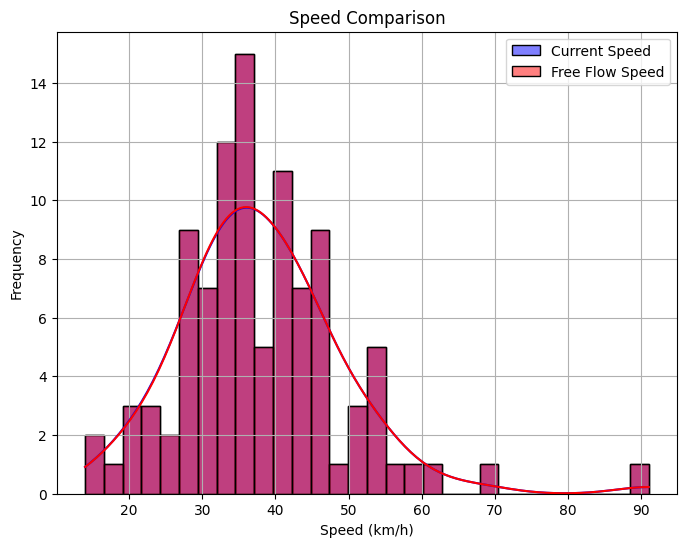

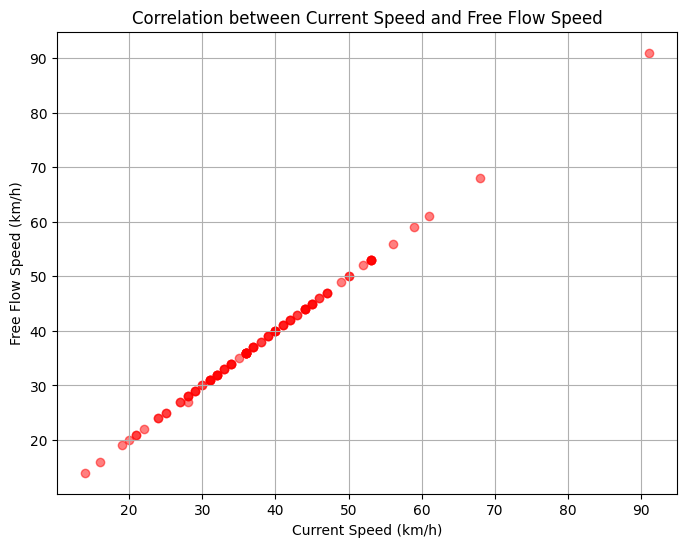

ValueError: could not convert string to float: 'clear sky'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("delhi_traffic_data.csv")
df.head()
df.shape

df.isnull().sum()

plt.figure(figsize=(8, 6))

sns.histplot(df['Current Speed (km/h)'], bins=30, color='blue', alpha=0.5, kde=True, label="Current Speed")
sns.histplot(df['Free Flow Speed (km/h)'], bins=30, color='red', alpha=0.5, kde=True, label="Free Flow Speed")

plt.xlabel("Speed (km/h)")
plt.ylabel("Frequency")
plt.title("Speed Comparison")
plt.legend()
plt.grid(True)

plt.show()

plt.figure(figsize=(8, 6))
plt.scatter( df['Free Flow Speed (km/h)'],df['Current Speed (km/h)'], alpha=0.5, color='red')
plt.xlabel("Current Speed (km/h)")
plt.ylabel("Free Flow Speed (km/h)")
plt.title("Correlation between Current Speed and Free Flow Speed")
plt.grid(True)
plt.show()

corrs=df.corr()
sns.heatmap(corrs,annot=True)